<a href="https://colab.research.google.com/github/zarembaMichal/LetsStart/blob/main/Fluid_flow_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flow Determination Task

## Introduction

This task involves determining the flow directions for several Flow Measurement Units (FMUs) connected to a water tank with a capacity of 12 cubic meters. The tank was initially empty, and we know the flow directions for one pair of FMU meters. Using the available data, our goal is to determine the flow directions for the remaining FMUs.

## Load and Inspect the Dataset


In [ ]:
# Load necessary libraries
import pandas as pd

tank_size_cubic = 12
tank_size_l = tank_size_cubic * 1000

# Load the dataset
file_path = 'task1.csv'
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataset
data.sample(10)

,meter_id,date,value
27471,FMU_3B,2020-09-05 16:00:00,0
32083,FMU_3A,2020-07-17 20:00:00,0
41369,FMU_4B,2020-04-11 18:00:00,"23,3051924707827"
41868,FMU_4B,2020-05-02 13:00:00,0
33168,FMU_3A,2020-09-01 01:00:00,0
12567,FMU_2A,2020-04-21 16:00:00,"128,190095697868"
42942,FMU_4B,2020-06-16 07:00:00,0
4304,FMU_1B,2020-09-08 09:00:00,0
13763,FMU_2A,2020-06-10 12:00:00,0
18493,FMU_2B,2020-04-26 14:00:00,0


## Data Preparation

In [ ]:
# Check the data type of each column
data.dtypes

meter_id            object
date        datetime64[ns]
value              float64
dtype: object

In [ ]:
# Ensure the 'value' column is treated as a string, then replace commas with dots
data['value'] = data['value'].astype(str).str.replace(',', '.')

# Convert the 'value' column to numeric
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check for missing values
data.isna().sum()

meter_id    0
date        0
value       0
dtype: int64

## Exploratory Data Analysis (EDA)

### Checking the datatype

In [ ]:
data.dtypes

meter_id            object
date        datetime64[ns]
value              float64
dtype: object

### Basic Statistics

In [ ]:
# Summary statistics for each FMU
fmu_stats = data.groupby('meter_id')['value'].describe()

fmu_stats

,count,mean,std,min,25%,50%,75%,max
meter_id,,,,,,,,
FMU_1A,5808.0,28.811069,47.605313,0.0,0.0,0.0,58.268225,256.346396
FMU_1B,5808.0,5.377370,16.120126,0.0,0.0,0.0,0.000000,116.536451
FMU_2A,5808.0,21.643923,43.439554,0.0,0.0,0.0,0.000000,233.072901
FMU_2B,5808.0,0.026084,0.550771,0.0,0.0,0.0,0.000000,11.654694
FMU_3A,5808.0,5.441578,16.122539,0.0,0.0,0.0,0.000000,116.536451
FMU_3B,5808.0,0.006019,0.264810,0.0,0.0,0.0,0.000000,11.653679
FMU_4A,5808.0,7.720941,26.822379,0.0,0.0,0.0,0.000000,256.384503
FMU_4B,5808.0,2.339557,11.099524,0.0,0.0,0.0,0.000000,209.763513


### Time Series Visualization - all time

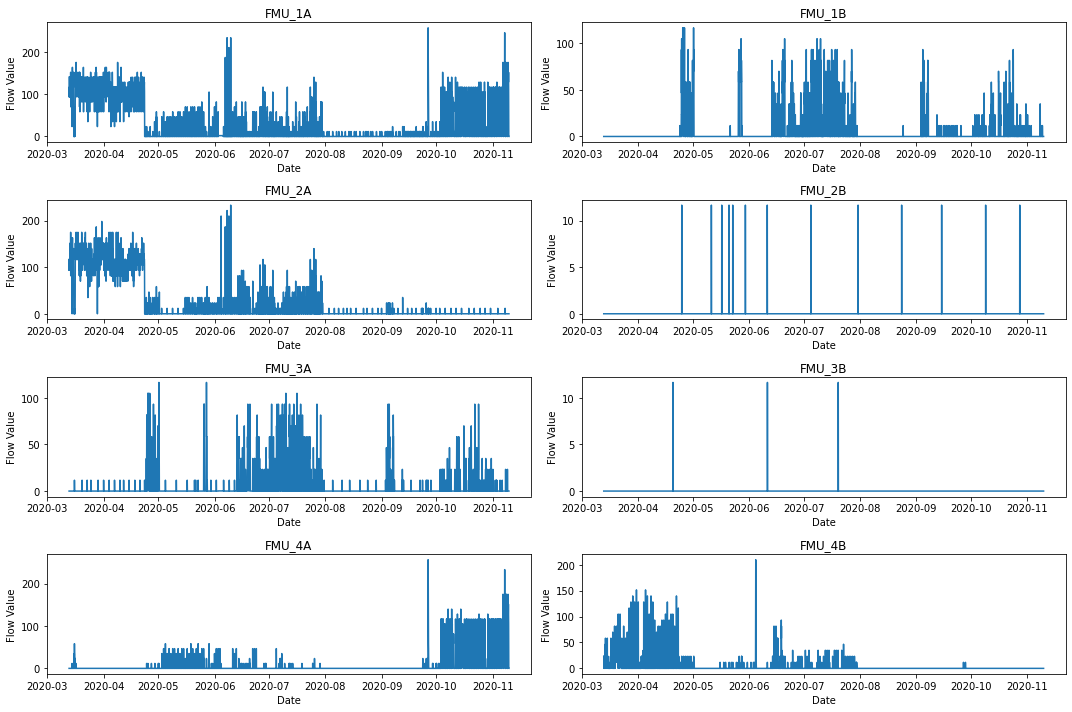

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Step 1: Sort the dataset first by 'meter_id' and then by 'date'
data_sorted = data.sort_values(by=['meter_id', 'date'])

# Step 2: Plot time series for each FMU
plt.figure(figsize=(15, 10))

for i, fmu in enumerate(data_sorted['meter_id'].unique(), start=1):
    plt.subplot(4, 2, i)
    plt.plot(data_sorted[data_sorted['meter_id'] == fmu]['date'],
             data_sorted[data_sorted['meter_id'] == fmu]['value'])
    plt.title(fmu)
    plt.xlabel('Date')
    plt.ylabel('Flow Value')
    plt.tight_layout()

plt.show()

### Time Series Visualization - beggining zoom

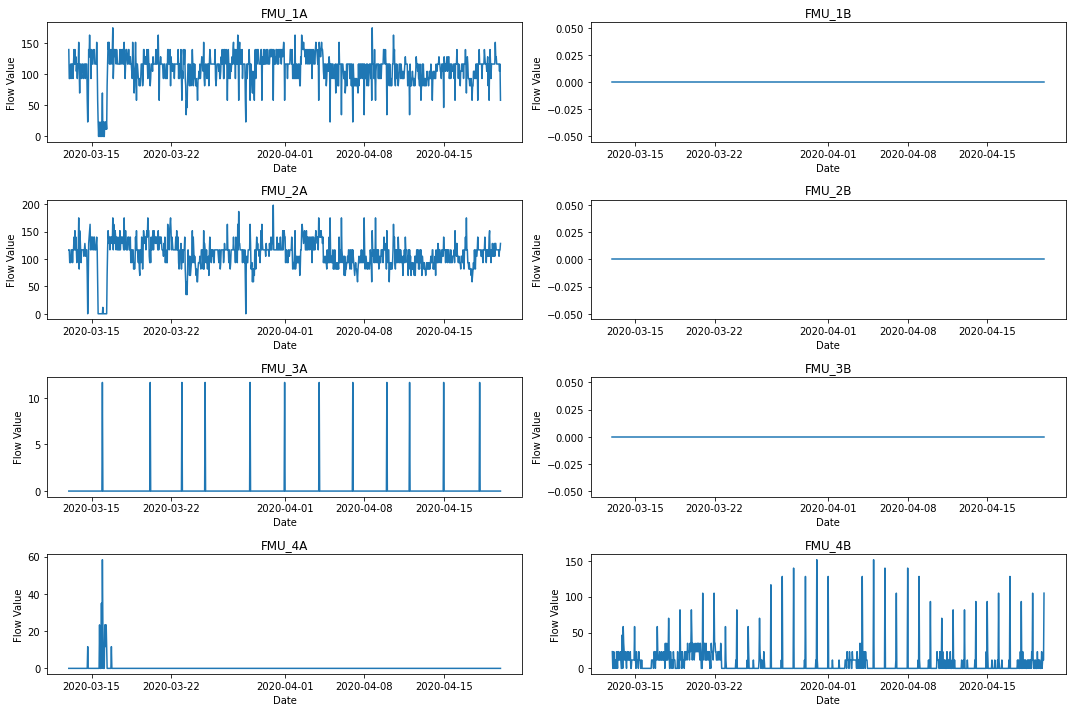

In [ ]:
# Import necessary libraries for visualization

# Step 1: Convert 'date' column to datetime if not already done
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Step 2: Filter the dataset to include only data up until April 20, 2020
end_date = '2020-04-20'
data_till_20_april_2020 = data_sorted[data_sorted['date'] <= end_date]

# Step 3: Sort the filtered dataset by 'meter_id' and then by 'date'
data_till_20_april_2020 = data_till_20_april_2020.sort_values(by=['meter_id', 'date'])

# Step 4: Plot time series for each FMU
plt.figure(figsize=(15, 10))

for i, fmu in enumerate(data_till_20_april_2020['meter_id'].unique(), start=1):
    plt.subplot(4, 2, i)
    plt.plot(data_till_20_april_2020[data_till_20_april_2020['meter_id'] == fmu]['date'],
             data_till_20_april_2020[data_till_20_april_2020['meter_id'] == fmu]['value'])
    plt.title(fmu)
    plt.xlabel('Date')
    plt.ylabel('Flow Value')
    plt.tight_layout()

plt.show()

Since some fluid flows are insignificant during this period, it is best to omit them

In [ ]:
# List of meter_ids where the 'value' will be set to 0
meter_ids_to_zero = ['FMU_1B', 'FMU_2B', 'FMU_3A', 'FMU_3B', 'FMU_4A']

# Create a new dataset and set 'value' to 0 where 'meter_id' is in the specified list
data_till_20_april_2020_clean = data_till_20_april_2020.copy()  # Make a copy of the original dataset
data_till_20_april_2020_clean.loc[data_till_20_april_2020_clean['meter_id'].isin(meter_ids_to_zero), 'value'] = 0

# Display the first few rows of the new dataset to confirm the change
data_till_20_april_2020_clean.head()

,meter_id,date,value
5808,FMU_1A,2020-03-13 00:00:00,139.843741
5809,FMU_1A,2020-03-13 01:00:00,93.229161
5810,FMU_1A,2020-03-13 02:00:00,93.246641
5811,FMU_1A,2020-03-13 03:00:00,104.865325
5812,FMU_1A,2020-03-13 04:00:00,116.536451


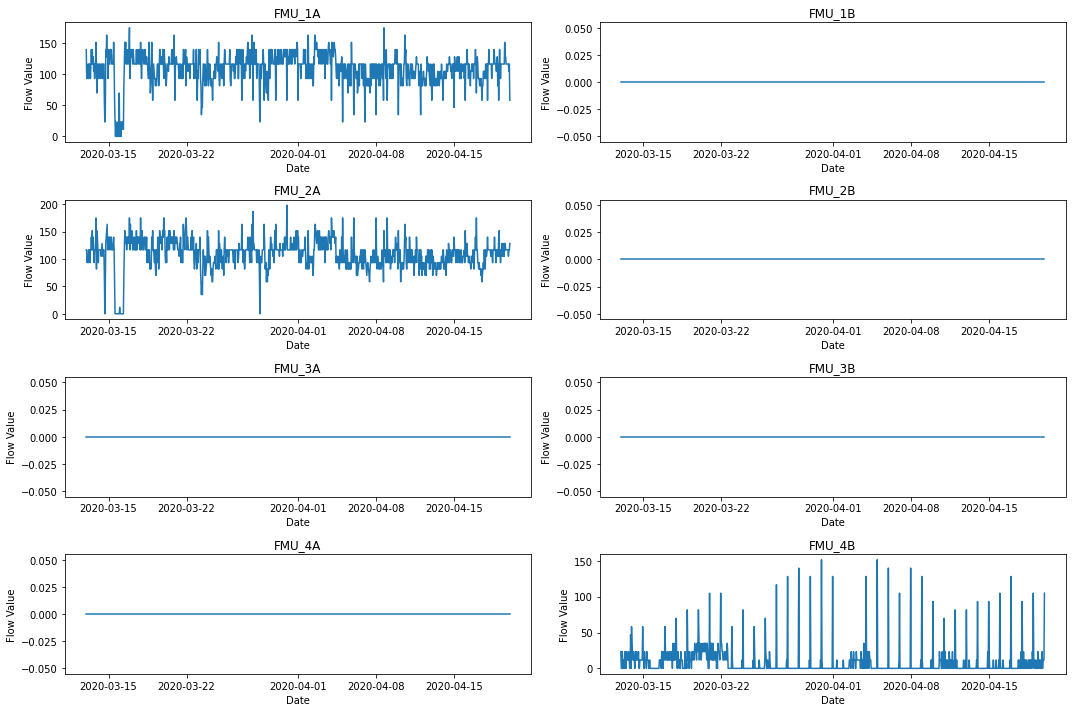

In [ ]:
# Sort the filtered dataset by 'meter_id' and then by 'date'
data_till_20_april_2020_clean = data_till_20_april_2020_clean.sort_values(by=['meter_id', 'date'])

# Plot time series for each FMU
plt.figure(figsize=(15, 10))

for i, fmu in enumerate(data_till_20_april_2020_clean['meter_id'].unique(), start=1):
    plt.subplot(4, 2, i)
    plt.plot(data_till_20_april_2020_clean[data_till_20_april_2020_clean['meter_id'] == fmu]['date'],
             data_till_20_april_2020_clean[data_till_20_april_2020_clean['meter_id'] == fmu]['value'])
    plt.title(fmu)
    plt.xlabel('Date')
    plt.ylabel('Flow Value')
    plt.tight_layout()

plt.show()

### Identifying and Displaying Duplicate Entries

In [ ]:
# Check for duplicates based on the combination of date and meter_id
duplicates = data_till_20_april_2020_clean[data_till_20_april_2020_clean.duplicated(subset=['date', 'meter_id'], keep=False)]

# Display a sample of the duplicates
print("Sample of Duplicates:")
print(duplicates.head())

# Show the total number of duplicates
num_duplicates = duplicates.shape[0]
print(f"\nTotal number of duplicate entries: {num_duplicates}")

Sample of Duplicates:
Empty DataFrame
Columns: [meter_id, date, value]
Index: []

Total number of duplicate entries: 0


### Transforming the Dataset: Sorting by Date and Pivoting by Meter ID

In [ ]:
# Pivot the dataset so that each meter_id becomes a column
data_pivoted = data_till_20_april_2020_clean.pivot(index='date', columns='meter_id', values='value')

# Add an ID column as the first column
data_pivoted.reset_index(inplace=True)  # Reset index to make 'date' a regular column
data_pivoted.insert(0, 'ID', range(1, len(data_pivoted) + 1))  # Insert ID column at the first position

# Display the first 20 rows of the transformed dataset
data_pivoted.head(10)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B
0,1,2020-03-13 00:00:00,139.843741,0.0,116.536451,0.0,0.0,0.0,0.0,23.306241
1,2,2020-03-13 01:00:00,93.229161,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000
2,3,2020-03-13 02:00:00,93.246641,0.0,93.246641,0.0,0.0,0.0,0.0,0.000000
3,4,2020-03-13 03:00:00,104.865325,0.0,104.865325,0.0,0.0,0.0,0.0,23.307290
4,5,2020-03-13 04:00:00,116.536451,0.0,93.229161,0.0,0.0,0.0,0.0,11.654694
5,6,2020-03-13 05:00:00,93.229161,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000
6,7,2020-03-13 06:00:00,116.536451,0.0,116.536451,0.0,0.0,0.0,0.0,11.652596
7,8,2020-03-13 07:00:00,116.536451,0.0,116.536451,0.0,0.0,0.0,0.0,11.653645
8,9,2020-03-13 08:00:00,116.536451,0.0,93.246641,0.0,0.0,0.0,0.0,0.000000
9,10,2020-03-13 09:00:00,93.246641,0.0,116.536451,0.0,0.0,0.0,0.0,23.307290


### Assuming that all 3 flows are in

In [ ]:
# Identify the flow columns
flow_columns = [col for col in data_pivoted.columns if col.startswith('FMU_')]

# Calculate the sum of all flows
data_pivoted['total_flows'] = data_pivoted[flow_columns].sum(axis=1)

# Calculate the cumulative sum of the 'total_flows' column
data_pivoted['net_flow_cumsum'] = data_pivoted['total_flows'].cumsum()

# Display the first and last few rows with the new 'net_flow_cumsum' column
data_pivoted.head(70)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B,total_flows,net_flow_cumsum
0,1,2020-03-13 00:00:00,139.843741,0.0,116.536451,0.0,0.0,0.0,0.0,23.306241,279.686433,279.686433
1,2,2020-03-13 01:00:00,93.229161,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000,209.765611,489.452044
2,3,2020-03-13 02:00:00,93.246641,0.0,93.246641,0.0,0.0,0.0,0.0,0.000000,186.493282,675.945326
3,4,2020-03-13 03:00:00,104.865325,0.0,104.865325,0.0,0.0,0.0,0.0,23.307290,233.037940,908.983266
4,5,2020-03-13 04:00:00,116.536451,0.0,93.229161,0.0,0.0,0.0,0.0,11.654694,221.420305,1130.403571
...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,2020-03-15 17:00:00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,15114.776598
66,67,2020-03-15 18:00:00,11.671126,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,11.671126,15126.447724
67,68,2020-03-15 19:00:00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,15126.447724
68,69,2020-03-15 20:00:00,23.289810,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,23.289810,15149.737534


#### Assuming that all three flows are entering the tank simultaneously, the tank's capacity is insufficient to accommodate the incoming flow—it's too small.
#### Next, we'll check if it's possible for a relatively smaller outflow to occur, allowing the tank to hold the water until the next relatively large inflow occurs after April 20th

In [ ]:
# Identify all flow columns
flow_columns_v2 = [col for col in data_pivoted.columns if col.startswith('FMU_')]

# Calculate the sum of all flows
data_pivoted['total_flows_v2'] = data_pivoted[flow_columns_v2].sum(axis=1)

# Subtract 'FMU_4B' from the total flows to get the net flow
data_pivoted['net_flow_v2'] = data_pivoted['total_flows_v2'] - data_pivoted['FMU_4B']

# Calculate the cumulative sum of the 'net_flow_v2' column
data_pivoted['net_flow_cumsum_v2'] = data_pivoted['net_flow_v2'].cumsum()

# Display the first and last few rows with the new 'net_flow_cumsum_v2' column
data_pivoted.head(100)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B,total_flows_v2,net_flow_v2,net_flow_cumsum_v2
0,1,2020-03-13 00:00:00,139.843741,0.0,116.536451,0.0,0.0,0.0,0.0,23.306241,279.686433,256.380191,256.380191
1,2,2020-03-13 01:00:00,93.229161,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000,209.765611,209.765611,466.145803
2,3,2020-03-13 02:00:00,93.246641,0.0,93.246641,0.0,0.0,0.0,0.0,0.000000,186.493282,186.493282,652.639084
3,4,2020-03-13 03:00:00,104.865325,0.0,104.865325,0.0,0.0,0.0,0.0,23.307290,233.037940,209.730650,862.369735
4,5,2020-03-13 04:00:00,116.536451,0.0,93.229161,0.0,0.0,0.0,0.0,11.654694,221.420305,209.765611,1072.135346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2020-03-16 23:00:00,116.536451,0.0,163.133550,0.0,0.0,0.0,0.0,58.268225,337.938226,279.670001,18412.776681
96,97,2020-03-17 00:00:00,139.826260,0.0,128.207576,0.0,0.0,0.0,0.0,23.305192,291.339029,268.033836,18680.810517
97,98,2020-03-17 01:00:00,139.843741,0.0,139.826260,0.0,0.0,0.0,0.0,11.653645,291.323646,279.670001,18960.480518
98,99,2020-03-17 02:00:00,128.207576,0.0,151.514866,0.0,0.0,0.0,0.0,11.653645,291.376088,279.722442,19240.202961


#### Based on this analysis, it can be concluded that FMU_2A acts as an outlet.

#### Now lets assume both FMU_2A and FMU_4B are outlets. If by 20 of April tank level is below 0 it can not be true

In [ ]:
# Create a copy of the original data_pivoted to a new DataFrame for version 3
data_pivoted_v3 = data_pivoted.copy()

# Subtract 'FMU_4B' and 'FMU_2A' from the total flows to get the net flow
data_pivoted_v3['net_flow_v3'] = data_pivoted_v3['FMU_1A'] - data_pivoted_v3['FMU_4B'] - data_pivoted_v3['FMU_2A']

# Calculate the cumulative sum of the 'net_flow_v3' column
data_pivoted_v3['net_flow_cumsum_v3'] = data_pivoted_v3['net_flow_v3'].cumsum()

# Display the first 5 rows with the new columns
data_pivoted_v3.head(5)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B,total_flows_v2,net_flow_v2,net_flow_cumsum_v2,net_flow_v3,net_flow_cumsum_v3
0,1,2020-03-13 00:00:00,139.843741,0.0,116.536451,0.0,0.0,0.0,0.0,23.306241,279.686433,256.380191,256.380191,0.001049,0.001049
1,2,2020-03-13 01:00:00,93.229161,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000,209.765611,209.765611,466.145803,-23.307290,-23.306241
2,3,2020-03-13 02:00:00,93.246641,0.0,93.246641,0.0,0.0,0.0,0.0,0.000000,186.493282,186.493282,652.639084,0.000000,-23.306241
3,4,2020-03-13 03:00:00,104.865325,0.0,104.865325,0.0,0.0,0.0,0.0,23.307290,233.037940,209.730650,862.369735,-23.307290,-46.613531
4,5,2020-03-13 04:00:00,116.536451,0.0,93.229161,0.0,0.0,0.0,0.0,11.654694,221.420305,209.765611,1072.135346,11.652596,-34.960935


#### Based on this assumption, it becomes evident that if both FMU_2A and FMU_4B were outlets, the water tank’s capacity would fall below zero. Since this scenario is impossible, we can conclude that FMU_4B functions as an inlet, while FMU_4A serves as an outlet.

 Check of FUM_4B as an inlet and FMU_2A as an outlet

In [ ]:
# Step 1: Create a copy of the original data_pivoted to a new DataFrame for version 3
data_pivoted_v4 = data_pivoted.copy()

# Step 4: Subtract 'FMU_4B' from the total flows to get the net flow
data_pivoted_v4['net_flow_v4'] = data_pivoted_v4['FMU_1A'] + data_pivoted_v4['FMU_4B'] - data_pivoted_v4['FMU_2A']

# Step 5: Calculate the cumulative sum of the 'net_flow_v4' column
data_pivoted_v4['net_flow_cumsum_v4'] = data_pivoted_v4['net_flow_v4'].cumsum()

# Step 6: Display the first 5 rows with the new columns
data_pivoted_v4.head(5)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B,total_flows_v2,net_flow_v2,net_flow_cumsum_v2,net_flow_v4,net_flow_cumsum_v4
0,1,2020-03-13 00:00:00,139.843741,0.0,116.536451,0.0,0.0,0.0,0.0,23.306241,279.686433,256.380191,256.380191,46.613531,46.613531
1,2,2020-03-13 01:00:00,93.229161,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000,209.765611,209.765611,466.145803,-23.307290,23.306241
2,3,2020-03-13 02:00:00,93.246641,0.0,93.246641,0.0,0.0,0.0,0.0,0.000000,186.493282,186.493282,652.639084,0.000000,23.306241
3,4,2020-03-13 03:00:00,104.865325,0.0,104.865325,0.0,0.0,0.0,0.0,23.307290,233.037940,209.730650,862.369735,23.307290,46.613531
4,5,2020-03-13 04:00:00,116.536451,0.0,93.229161,0.0,0.0,0.0,0.0,11.654694,221.420305,209.765611,1072.135346,34.961984,81.575515


In [ ]:
# Step 6: Display the last 5 rows with the new columns
data_pivoted_v4.tail(5)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B,total_flows_v2,net_flow_v2,net_flow_cumsum_v2,net_flow_v4,net_flow_cumsum_v4
907,908,2020-04-19 20:00:00,116.536451,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000,233.072901,233.072901,197983.843574,0.000000,8518.813493
908,909,2020-04-19 21:00:00,116.536451,0.0,104.849010,0.0,0.0,0.0,0.0,11.653645,233.039106,221.385461,198205.229035,23.341086,8542.154578
909,910,2020-04-19 22:00:00,104.849010,0.0,116.536451,0.0,0.0,0.0,0.0,11.653645,233.039106,221.385461,198426.614495,-0.033796,8542.120783
910,911,2020-04-19 23:00:00,116.536451,0.0,116.536451,0.0,0.0,0.0,0.0,11.655743,244.728644,233.072901,198659.687397,11.655743,8553.776525
911,912,2020-04-20 00:00:00,58.268225,0.0,128.223891,0.0,0.0,0.0,0.0,104.880708,291.372825,186.492117,198846.179513,34.925042,8588.701567


In [ ]:
# Check the minimum value of 'net_flow_cumsum_v4'
min_value = data_pivoted_v4['net_flow_cumsum_v4'].min()

# Check the maximum value of 'net_flow_cumsum_v6'
max_value = data_pivoted_v4['net_flow_cumsum_v4'].max()

# Print the results
print(f"Minimum value of net_flow_cumsum_v4: {min_value}")
print(f"Maximum value of net_flow_cumsum_v4: {max_value}")

Minimum value of net_flow_cumsum_v4: 23.306241298838202
Maximum value of net_flow_cumsum_v4: 8588.701567362674


#### Now the assumptions are met. The only missing flow directions are FUM_3A and FMU_3B. Let's model the flow for the entire data set as if FUM_3B were the inlet

In [ ]:
data_copy = data.copy()

In [ ]:
# Check for duplicates based on the combination of date and meter_id
duplicates_2 = data_copy[data_copy.duplicated(subset=['date', 'meter_id'], keep=False)]

# Display a sample of the duplicates
print("Sample of Duplicates:")
print(duplicates_2.head())

# Show the total number of duplicates
num_duplicates = duplicates_2.shape[0]
print(f"\nTotal number of duplicate entries: {num_duplicates}")

Sample of Duplicates:
      meter_id                date      value
5425    FMU_1B 2020-10-25 02:00:00   0.000000
5426    FMU_1B 2020-10-25 02:00:00  11.653645
11233   FMU_1A 2020-10-25 02:00:00   0.000000
11234   FMU_1A 2020-10-25 02:00:00   0.000000
17041   FMU_2A 2020-10-25 02:00:00   0.000000

Total number of duplicate entries: 16


In [ ]:
# Aggregating by taking the sum of values for each combination of date and meter_id
data_aggregated_2 = data_copy.groupby(['date', 'meter_id'], as_index=False).agg({'value': 'sum'})

# Display the first few rows of the aggregated dataset
data_aggregated_2.head()

,date,meter_id,value
0,2020-03-13,FMU_1A,139.843741
1,2020-03-13,FMU_1B,0.000000
2,2020-03-13,FMU_2A,116.536451
3,2020-03-13,FMU_2B,0.000000
4,2020-03-13,FMU_3A,0.000000


In [ ]:
# Check for duplicates based on the combination of date and meter_id
duplicates_3 = data_aggregated_2[data_aggregated_2.duplicated(subset=['date', 'meter_id'], keep=False)]

# Display a sample of the duplicates
print("Sample of Duplicates:")
print(duplicates_3.head())

# Show the total number of duplicates
num_duplicates = duplicates_3.shape[0]
print(f"\nTotal number of duplicate entries: {num_duplicates}")

Sample of Duplicates:
Empty DataFrame
Columns: [date, meter_id, value]
Index: []

Total number of duplicate entries: 0


In [ ]:
# Number of entries in the original unprocessed dataset
original_entry_count = data_copy.shape[0]
print(f"Number of entries in the original dataset: {original_entry_count}")

# Number of entries in the aggregated dataset
aggregated_entry_count = data_aggregated_2.shape[0]
print(f"Number of entries in the aggregated dataset: {aggregated_entry_count}")

# Calculate the difference
entry_difference = original_entry_count - aggregated_entry_count
print(f"Difference in number of entries: {entry_difference}")

Number of entries in the original dataset: 46464
Number of entries in the aggregated dataset: 46456
Difference in number of entries: 8


In [ ]:
# Pivot the dataset so that each meter_id becomes a column
data_pivoted_2 = data_aggregated_2.pivot(index='date', columns='meter_id', values='value')

# Add an ID column as the first column
data_pivoted_2.reset_index(inplace=True)  # Reset index to make 'date' a regular column
data_pivoted_2.insert(0, 'ID', range(1, len(data_pivoted_2) + 1))  # Insert ID column at the first position

# Display the first 20 rows of the transformed dataset
data_pivoted_2.head(10)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B
0,1,2020-03-13 00:00:00,139.843741,0.0,116.536451,0.0,0.0,0.0,0.0,23.306241
1,2,2020-03-13 01:00:00,93.229161,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000
2,3,2020-03-13 02:00:00,93.246641,0.0,93.246641,0.0,0.0,0.0,0.0,0.000000
3,4,2020-03-13 03:00:00,104.865325,0.0,104.865325,0.0,0.0,0.0,0.0,23.307290
4,5,2020-03-13 04:00:00,116.536451,0.0,93.229161,0.0,0.0,0.0,0.0,11.654694
5,6,2020-03-13 05:00:00,93.229161,0.0,116.536451,0.0,0.0,0.0,0.0,0.000000
6,7,2020-03-13 06:00:00,116.536451,0.0,116.536451,0.0,0.0,0.0,0.0,11.652596
7,8,2020-03-13 07:00:00,116.536451,0.0,116.536451,0.0,0.0,0.0,0.0,11.653645
8,9,2020-03-13 08:00:00,116.536451,0.0,93.246641,0.0,0.0,0.0,0.0,0.000000
9,10,2020-03-13 09:00:00,93.246641,0.0,116.536451,0.0,0.0,0.0,0.0,23.307290


In [ ]:
# Create a copy of the original data_pivoted to a new DataFrame for version 5
data_pivoted_v5 = data_pivoted_2.copy()

# Adding
data_pivoted_v5['net_flow_v5'] = data_pivoted_v5['FMU_1A'] - data_pivoted_v5['FMU_1B'] \
                                -data_pivoted_v5['FMU_2A'] + data_pivoted_v5['FMU_2B'] \
                                -data_pivoted_v5['FMU_3A'] + data_pivoted_v5['FMU_3B'] \
                                -data_pivoted_v5['FMU_4A'] + data_pivoted_v5['FMU_4B'] \

# Calculate the cumulative sum of the 'net_flow_v' column
data_pivoted_v5['net_flow_cumsum_v5'] = data_pivoted_v5['net_flow_v5'].cumsum()

# Display the first 5 rows with the new columns
data_pivoted_v5.head(1000)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B,net_flow_v5,net_flow_cumsum_v5
0,1,2020-03-13 00:00:00,139.843741,0.0,116.536451,0.0,0.000000,0.0,0.0,23.306241,46.613531,46.613531
1,2,2020-03-13 01:00:00,93.229161,0.0,116.536451,0.0,0.000000,0.0,0.0,0.000000,-23.307290,23.306241
2,3,2020-03-13 02:00:00,93.246641,0.0,93.246641,0.0,0.000000,0.0,0.0,0.000000,0.000000,23.306241
3,4,2020-03-13 03:00:00,104.865325,0.0,104.865325,0.0,0.000000,0.0,0.0,23.307290,23.307290,46.613531
4,5,2020-03-13 04:00:00,116.536451,0.0,93.229161,0.0,0.000000,0.0,0.0,11.654694,34.961984,81.575515
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2020-04-23 12:00:00,104.882806,0.0,104.849010,0.0,0.000000,0.0,0.0,11.655743,11.689538,9019.922328
996,997,2020-04-23 13:00:00,0.000000,0.0,11.687441,0.0,11.653645,0.0,0.0,0.000000,-23.341086,8996.581242
997,998,2020-04-23 14:00:00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,8996.581242
998,999,2020-04-23 15:00:00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,8996.581242


In [ ]:
# Check the minimum value of 'net_flow_cumsum_v5'
min_value = data_pivoted_v5['net_flow_cumsum_v5'].min()

# Check the maximum value of 'net_flow_cumsum_v5'
max_value = data_pivoted_v5['net_flow_cumsum_v5'].max()

# Print the results
print(f"Minimum value of net_flow_cumsum_v5: {min_value}")
print(f"Maximum value of net_flow_cumsum_v5: {max_value}")


Minimum value of net_flow_cumsum_v5: -52289.939161468086
Maximum value of net_flow_cumsum_v5: 9019.922327937153


This turned out to be impossible, since the capacity of the tank cannot fall below 0. Let's check the opposite scenario, in which FUM_3A is the inlet.

In [ ]:
# Create a copy of the original data_pivoted to a new DataFrame for version 6
data_pivoted_v6 = data_pivoted_2.copy()

# Adding
data_pivoted_v6['net_flow_v6'] = data_pivoted_v6['FMU_1A'] - data_pivoted_v6['FMU_1B'] \
                                -data_pivoted_v6['FMU_2A'] + data_pivoted_v6['FMU_2B'] \
                                +data_pivoted_v6['FMU_3A'] - data_pivoted_v6['FMU_3B'] \
                                -data_pivoted_v6['FMU_4A'] + data_pivoted_v6['FMU_4B'] \

# Calculate the cumulative sum of the 'net_flow_v4' column
data_pivoted_v6['net_flow_cumsum_v6'] = data_pivoted_v6['net_flow_v6'].cumsum()

# Display the first and last few rows with the new columns
data_pivoted_v6.head(1000)

meter_id,ID,date,FMU_1A,FMU_1B,FMU_2A,FMU_2B,FMU_3A,FMU_3B,FMU_4A,FMU_4B,net_flow_v6,net_flow_cumsum_v6
0,1,2020-03-13 00:00:00,139.843741,0.0,116.536451,0.0,0.000000,0.0,0.0,23.306241,46.613531,46.613531
1,2,2020-03-13 01:00:00,93.229161,0.0,116.536451,0.0,0.000000,0.0,0.0,0.000000,-23.307290,23.306241
2,3,2020-03-13 02:00:00,93.246641,0.0,93.246641,0.0,0.000000,0.0,0.0,0.000000,0.000000,23.306241
3,4,2020-03-13 03:00:00,104.865325,0.0,104.865325,0.0,0.000000,0.0,0.0,23.307290,23.307290,46.613531
4,5,2020-03-13 04:00:00,116.536451,0.0,93.229161,0.0,0.000000,0.0,0.0,11.654694,34.961984,81.575515
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2020-04-23 12:00:00,104.882806,0.0,104.849010,0.0,0.000000,0.0,0.0,11.655743,11.689538,9299.609809
996,997,2020-04-23 13:00:00,0.000000,0.0,11.687441,0.0,11.653645,0.0,0.0,0.000000,-0.033796,9299.576014
997,998,2020-04-23 14:00:00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,9299.576014
998,999,2020-04-23 15:00:00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,9299.576014


In [ ]:
# Check the minimum value of 'net_flow_cumsum_v6'
min_value = data_pivoted_v6['net_flow_cumsum_v6'].min()

# Check the maximum value of 'net_flow_cumsum_v6'
max_value = data_pivoted_v6['net_flow_cumsum_v6'].max()

# Print the results
print(f"Minimum value of net_flow_cumsum_v6: {min_value}")
print(f"Maximum value of net_flow_cumsum_v6: {max_value}")

Minimum value of net_flow_cumsum_v6: 23.306241298838188
Maximum value of net_flow_cumsum_v6: 11047.655486353518


#### The conditions of the water tank in this case are met.

## Answer

In [ ]:
# Define the data as a dictionary
flow_data = {
    'Meter': ['FMU_1A', 'FMU_1B', 'FMU_2A', 'FMU_2B', 'FMU_3A', 'FMU_3B', 'FMU_4A', 'FMU_4B'],
    'Flow direction relative to Tank': ['IN', 'OUT', 'OUT', 'IN', 'IN', 'OUT', 'OUT', 'IN']
}

# Create a DataFrame from the dictionary
df_flow_directions = pd.DataFrame(flow_data)

# Display the DataFrame
df_flow_directions

,Meter,Flow direction relative to Tank
0,FMU_1A,IN
1,FMU_1B,OUT
2,FMU_2A,OUT
3,FMU_2B,IN
4,FMU_3A,IN
5,FMU_3B,OUT
6,FMU_4A,OUT
7,FMU_4B,IN
